In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
pounds = np.array([3.5, 3.69, 3.44, 3.43, 4.34, 4.42, 2.37])
miles = np.array([18, 15, 18, 16, 15, 14, 24])

In [124]:
data = pd.DataFrame({'Pounds in 1000s': pounds, 'Miles per gallon': miles})

In [125]:
data.head()

,Pounds in 1000s,Miles per gallon
0,3.50,18
1,3.69,15
2,3.44,18
3,3.43,16
4,4.34,15


In [266]:
w = 0
b = 0
lr = 0.01
x = pounds
y = miles
iterations = 50
tracking = pd.DataFrame()
weight_track, bias_track, loss_track, dw_track, db_track = [],[],[],[],[]
y_hat_track = np.zeros((iterations,7))
i = 0


### Manual

In [228]:
weight_track.append(w)
bias_track.append(b)
y_hat = w * x + b
y_hat_track[i] = y_hat
print(y_hat)

[12.91  13.556 12.706 12.672 15.766 16.038  9.068]


In [229]:
loss = np.mean(np.square(y-y_hat))
loss_track.append(loss)
print(loss)

42.11429714285714


In [230]:
d_w = np.mean((y_hat - y) *2*x)
dw_track.append(d_w)
print(d_w)
d_b = np.mean((y_hat - y) *2)
db_track.append(d_b)
print(d_b)

-21.664628571428576
-7.795428571428572


In [231]:
w = (w - lr * d_w).round(2)
b = (b - lr * d_b).round(2)
print(f'w = {w}\nb = {b}')

w = 3.62
b = 1.09


In [232]:
i+=1
print(f'Iteration: {i}')

Iteration: 6


In [233]:
tracking = tracking.assign(W = weight_track, B = bias_track, Loss = loss_track, d_w = dw_track, d_b = db_track)

In [234]:
tracking.head(6)

,W,B,Loss,d_w,d_b
0,0.00,0.00,303.714286,-119.717143,-34.285714
1,1.20,0.34,170.673326,-85.228914,-24.969143
2,2.05,0.59,103.224092,-60.733779,-18.351571
3,2.66,0.77,68.663572,-43.150683,-13.601314
4,3.09,0.91,51.125969,-30.661653,-10.226543
5,3.40,1.01,42.114297,-21.664629,-7.795429


In [235]:
print(y_hat_track)

[[ 0.      0.      0.      0.      0.      0.      0.    ]
 [ 4.54    4.768   4.468   4.456   5.548   5.644   3.184 ]
 [ 7.765   8.1545  7.642   7.6215  9.487   9.651   5.4485]
 [10.08   10.5854  9.9204  9.8938 12.3144 12.5272  7.0742]
 [11.725  12.3121 11.5396 11.5087 14.3206 14.5678  8.2333]
 [12.91   13.556  12.706  12.672  15.766  16.038   9.068 ]]


### Automation

In [267]:
for i in range(iterations):
    weight_track.append(w)
    bias_track.append(b)

    y_hat = w * x + b
    loss = np.mean((y_hat - y)**2)
    y_hat_track[i] = y_hat
    loss_track.append(loss)

    dw = np.mean((y_hat-y)*2*x)
    db = np.mean((y_hat-y)*2)
    dw_track.append(dw)
    db_track.append(db)
    
    w = (w - lr * dw).round(2)
    b = (b - lr * db).round(2)
    



In [268]:
tracking = tracking.assign(W = weight_track, B = bias_track, Loss = loss_track, d_w = dw_track, d_b = db_track)

In [271]:
tracking.tail(5)

,W,B,Loss,d_w,d_b
45,3.97,1.99,31.444240,0.608141,-1.733057
46,3.96,2.01,31.403793,0.485074,-1.765029
47,3.96,2.03,31.368893,0.629017,-1.725029
48,3.95,2.05,31.328398,0.505950,-1.757000
49,3.94,2.07,31.288494,0.382883,-1.788971


In [272]:
print(y_hat_track[49])

[15.86   16.6086 15.6236 15.5842 19.1696 19.4848 11.4078]


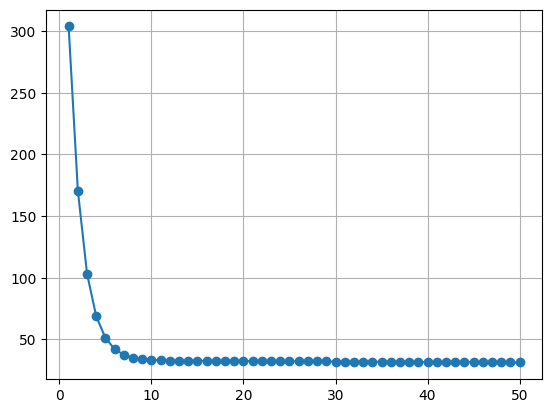

In [270]:
plt.plot(range(1,iterations+1), tracking['Loss'], label='Loss', marker='o')
plt.grid()
plt.show()